In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go


In [2]:
from data_wrangling import get_national
from cancer_plotting import plot_stacked

In [ ]:
# code example being used - note will need to run the national_data code first 
national_data_link = r'https://www.england.nhs.uk/statistics/wp-content/' \
    + 'uploads/sites/2/2023/12/' \
    + 'CWT-CRS-National-Time-Series-Oct-2009-Oct-2023-with-Revisions.xlsx'

national_data = get_national(national_data_link)
labels = ['Within Standard_28', 'Outside Standard_28', 'Within Standard_31', 'Outside Standard_31'] 
data_to_plot=['Month','Within Standard_28', 'Outside Standard_28', 'Within Standard_31', 'Outside Standard_31']
fig, ax = plot_stacked(national_data[data_to_plot],labels,"Patients")

In [5]:
from data_wrangling import read_cancer_data, nhs_code_link, help_with
from data_wrangling import select_month, select_org, select_cancer, select_standard
from data_wrangling import select_data
from data_wrangling import proportion_breaches, rename_and_replace

from cancer_plotting import breaches_animated_plot

In [6]:
data = read_cancer_data()

In [7]:
data = proportion_breaches(rename_and_replace(data))

In [9]:
link_data = nhs_code_link()
# overlap = list(set(data['ORG CODE']) & set(link_data['ORG CODE']))
# unmatched = data[~data['ORG CODE'].astype(str).isin(link_data['ORG CODE'].astype(str))]

In [ ]:
#plt.figure(figsize=[10,10])
sns.stripplot(x='PERIOD', y = 'BREACHES', data=select_org(df=data,org_str='R1K'), hue = 'CANCER TYPE', legend=False)

In [ ]:
sns.lineplot(x='PERIOD', y='BREACHES', data=select_org(data,'R0A').groupby(by='PERIOD').sum())

Selected Suspected_acute_leukaemia


,PERIOD,YEAR,MONTH,STANDARD,ORG_CODE,STAGE/ROUTE,TREATMENT MODALITY,CANCER_TYPE,TOTAL,WITHIN STANDARD,BREACHES,PROPORTION_BREACHES,MOVING_AVERAGE
17495,2022-06-01,2022/23,JUN,28-day FDS,R0A,URGENT SUSPECTED CANCER,NaN,Suspected_acute_leukaemia,1.0,1.0,0.0,0.0,0.083333
34691,2022-08-01,2022/23,AUG,28-day FDS,R0A,URGENT SUSPECTED CANCER,NaN,Suspected_acute_leukaemia,1.0,0.0,1.0,1.0,0.444444
51929,2022-10-01,2022/23,OCT,28-day FDS,R0A,URGENT SUSPECTED CANCER,NaN,Suspected_acute_leukaemia,2.0,2.0,0.0,0.0,0.666667


In [ ]:
select_org(data)

In [ ]:
#//ToDo: write a function to fliter out only singificant breaches/ significant number of cases pe trust etc
# Create a report generating script, where a figure is plotted using the trust name from the link file using the org code

In [30]:
data


,PERIOD,YEAR,MONTH,STANDARD,ORG_CODE,STAGE/ROUTE,TREATMENT MODALITY,CANCER_TYPE,TOTAL,WITHIN STANDARD,BREACHES,PROPORTION_BREACHES,MOVING_AVERAGE
0,2022-04-01,2022/23,APR,28-day FDS,R1K,"BREAST SYMPTOMATIC, CANCER NOT SUSPECTED",NaN,Unsuspected_breast_ca,262.0,255.0,7.0,0.026718,NaN
1,2022-04-01,2022/23,APR,28-day FDS,R0A,"BREAST SYMPTOMATIC, CANCER NOT SUSPECTED",NaN,Unsuspected_breast_ca,382.0,144.0,238.0,0.623037,NaN
2,2022-04-01,2022/23,APR,28-day FDS,R0D,"BREAST SYMPTOMATIC, CANCER NOT SUSPECTED",NaN,Unsuspected_breast_ca,3.0,2.0,1.0,0.333333,0.327696
3,2022-04-01,2022/23,APR,28-day FDS,R1F,"BREAST SYMPTOMATIC, CANCER NOT SUSPECTED",NaN,Unsuspected_breast_ca,66.0,63.0,3.0,0.045455,0.333942
4,2022-04-01,2022/23,APR,28-day FDS,RAS,"BREAST SYMPTOMATIC, CANCER NOT SUSPECTED",NaN,Unsuspected_breast_ca,81.0,78.0,3.0,0.037037,0.138608
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103180,2023-03-01,2022/23,MAR,62-day Combined,RWD,Urgent Suspected Cancer,Surgery,All_Cancers,83.5,53.5,30.0,0.359281,0.320303
103181,2023-03-01,2022/23,MAR,62-day Combined,RWP,Urgent Suspected Cancer,Surgery,All_Cancers,116.5,70.5,46.0,0.394850,0.366762
103182,2023-03-01,2022/23,MAR,62-day Combined,RXN,Urgent Suspected Cancer,Surgery,All_Cancers,73.0,27.0,46.0,0.630137,0.461423
103183,2023-03-01,2022/23,MAR,62-day Combined,RXW,Urgent Suspected Cancer,Surgery,All_Cancers,103.0,65.5,37.5,0.364078,0.463021


Selected Suspected_hematological_malignancies


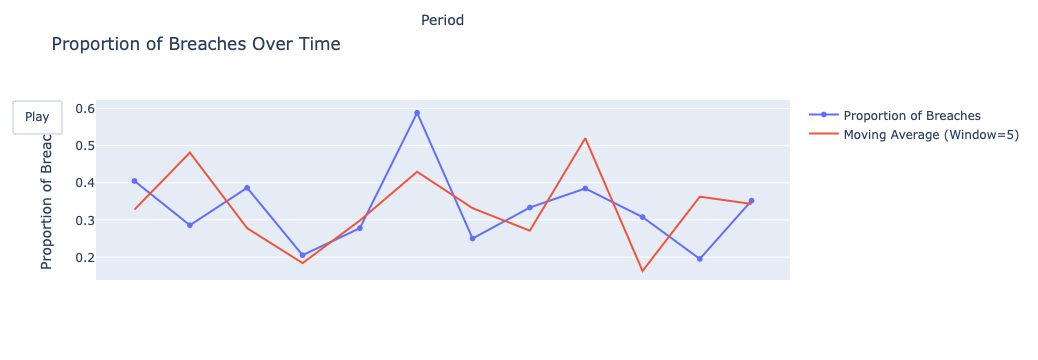

In [55]:
# Need to add informative title displaying type of cancer and full name of organisation + national standard on the plot
# Need to handle if some orgs do not have certain cancers/standards
trial = select_data(data,[('cancer',9), ('org', 'r0a'), ('standard', 'FDS')])
breaches_animated_plot(trial, [])


In [17]:
cancer_col_name = 'CANCER_TYPE'
cancer_type_dict = {i + 1: cancer_type for i, cancer_type in enumerate(data[cancer_col_name].unique())}

In [59]:
data.ORG_CODE.unique()

array(['R1K', 'R0A', 'R0D', 'R1F', 'RAS', 'RA9', 'RAE', 'RCF', 'RA2',
       'R1H', 'RCB', 'RA4', 'RJL', 'RAL', 'RCD', 'RD1', 'RAX', 'RAP',
       'RFR', 'RAJ', 'RK9', 'RBN', 'RGN', 'RDE', 'RBD', 'REM', 'RJZ',
       'RBK', 'RM1', 'RC9', 'RGP', 'REF', 'RCX', 'RF4', 'RP5', 'RBT',
       'RMC', 'RPY', 'RH8', 'RFS', 'RGT', 'RFF', 'RTR', 'RD8', 'RMP',
       'RWE', 'RJ2', 'RGR', 'RH5', 'RJ6', 'RVV', 'RDU', 'RRF', 'RWG',
       'RJE', 'RJ7', 'RHW', 'RJC', 'RWP', 'RHM', 'RTD', 'RXL', 'RLT',
       'RK5', 'RJ1', 'RKB', 'RNS', 'RHQ', 'RTE', 'RN5', 'RQW', 'RKE',
       'RJN', 'RNA', 'RTG', 'RHU', 'RWA', 'RNZ', 'RTK', 'RL4', 'RN7',
       'RR7', 'RVW', 'RLQ', 'RWD', 'RTH', 'RWW', 'RNQ', 'RNN', 'RTP',
       'RWY', 'RN3', 'RX1', 'RTX', 'RXC', 'RQX', 'RVJ', 'RXR', 'RXF',
       'RPA', 'RXN', 'RRV', 'RYJ', 'RQM', 'RTF', 'RR8', 'RXK', 'RRK',
       'RXP', 'RWF', 'RXW', 'RWH', 'RYR', 'REP', 'RBL', 'RQ3', 'RVR',
       'RM3', 'RVY', 'NV1', 'RXQ', 'RA7', 'RJR', 'R0B', 'RWJ', 'RET',
       'RP6', 'NYG',